### M_analysis

Performance analysis of particular employees in particular period.

Targets of the analysis:
- Check correlations between all of them.
- Especially see how influential 'x5' parameter is.
- Check performance distribution.
- Look for insights.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from scipy.stats import norm, skew

In [2]:
os.chdir(r"C:\Data\Илья\DataScience\Git\M_analysis")

In [3]:
data = pd.read_excel("M_data.xlsx")

In [4]:
data.head(2)

,Id,R_enc,M_enc,x1,x2,x3,x4,x5
0,1,5,6,171.0,175.0,100,90.0,78.0
1,2,4,8,91.0,90.0,98,89.0,138.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      479 non-null    int64  
 1   R_enc   479 non-null    int64  
 2   M_enc   479 non-null    int64  
 3   x1      479 non-null    float64
 4   x2      479 non-null    float64
 5   x3      479 non-null    int64  
 6   x4      479 non-null    float64
 7   x5      479 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 30.1 KB


### 1. Plot initial data
to find outliers

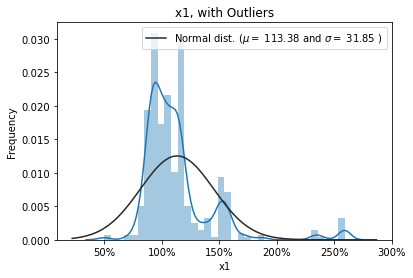

In [6]:
ax = sns.distplot(data.x1, fit=norm);
(mu, sigma) = norm.fit(data.x1)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylabel('Frequency')
plt.title('x1, with Outliers');

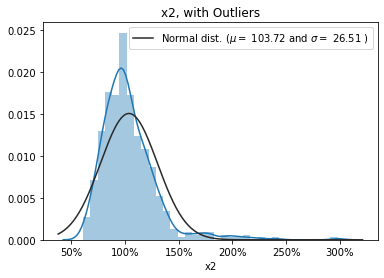

In [7]:
ax = sns.distplot(data.x2, fit=norm);
(mu, sigma) = norm.fit(data.x2)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('x2, with Outliers');

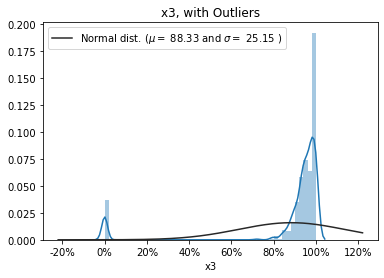

In [8]:
ax = sns.distplot(data.x3, fit=norm);
(mu, sigma) = norm.fit(data.x3)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('x3, with Outliers');

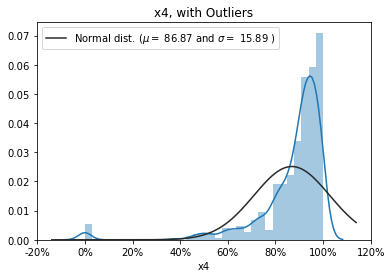

In [9]:
ax = sns.distplot(data.x4, fit=norm);
(mu, sigma) = norm.fit(data.x4)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('x4, with Outliers');

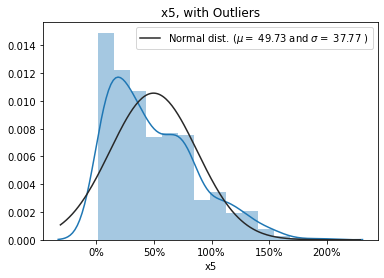

In [10]:
ax = sns.distplot(data.x5, fit=norm);
(mu, sigma) = norm.fit(data.x5)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('x5, with Outliers');

### 2. Deal with Outliers
 Exclude or Fill mean

In [11]:
data = data.drop(data[data.x1 >170].index)
data = data.drop(data[data.x1 <70].index)
data = data.drop(data[data.x2 >140].index)
data.loc[data.x3==0, 'x3'] = data[data.x3 !=0].x3.mean()
data.loc[data.x4==0, 'x4'] = data[data.x4 !=0].x4.mean()
data = data.drop(data[data.x5 >160].index)

### 3. Plot clean data
to see actual distribution

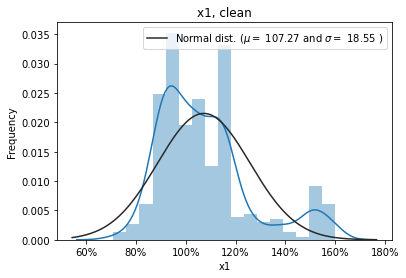

In [12]:
ax = sns.distplot(data.x1, fit=norm);
(mu, sigma) = norm.fit(data.x1)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylabel('Frequency')
plt.title('x1, clean');

Distribution is arguably Normal. But we can see additional peaks.

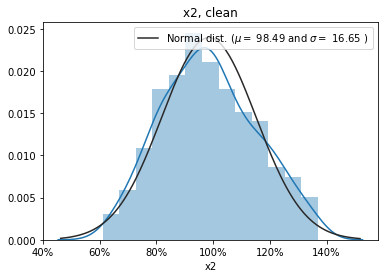

In [13]:
ax = sns.distplot(data.x2, fit=norm);
(mu, sigma) = norm.fit(data.x2)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('x2, clean');

Distribution is perfectly Normal!

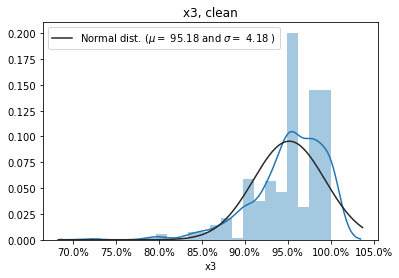

In [14]:
ax = sns.distplot(data.x3, fit=norm);
(mu, sigma) = norm.fit(data.x3)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('x3, clean');

Nature of variable doesnt suppose its distribution to be normal

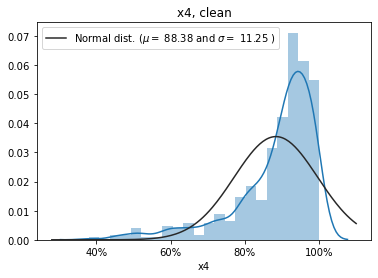

In [15]:
ax = sns.distplot(data.x4, fit=norm);
(mu, sigma) = norm.fit(data.x4)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('x4, clean');

Nature of variable doesnt suppose its distribution to be normal

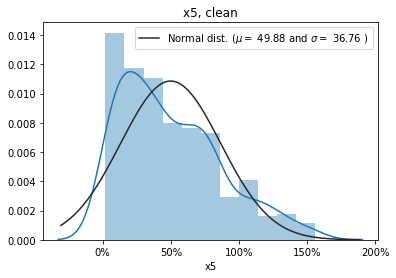

In [16]:
ax = sns.distplot(data.x5, fit=norm);
(mu, sigma) = norm.fit(data.x5)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('x5, clean');

Nature of variable doesnt suppose its distribution to be normal

### Correlation in data

In [17]:
data.columns

Index(['Id', 'R_enc', 'M_enc', 'x1', 'x2', 'x3', 'x4', 'x5'], dtype='object')

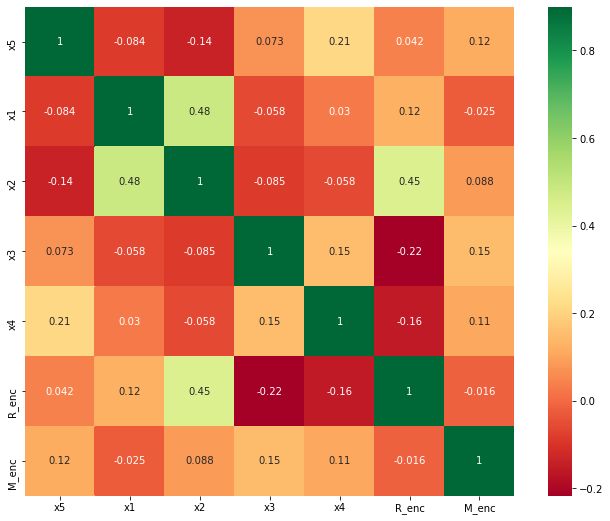

In [18]:
corrmat = data[['x5', 'x1', 'x2', 'x3', 'x4',  'R_enc', 'M_enc']].corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, cmap='RdYlGn', annot=True);

Plot insights:
    - Almost no correlation between x5 and any other parameters
    - Significant correclation between x1 and x2

### Lets see Scatterplots between x5 and other parameters

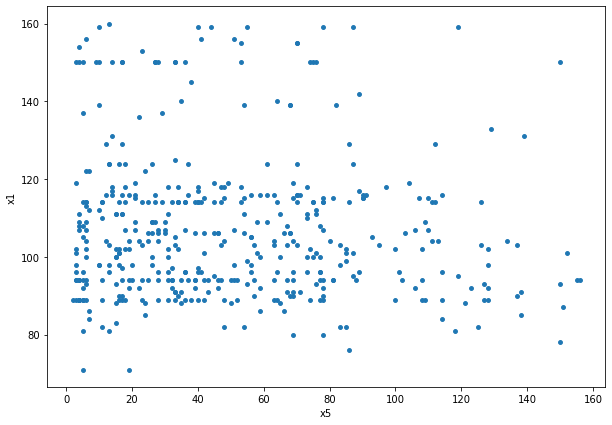

In [19]:
plt.figure(figsize=(10,7))
plt.scatter(data.x5, data.x1, s=15)
plt.xlabel("x5")
plt.ylabel("x1")
plt.show;

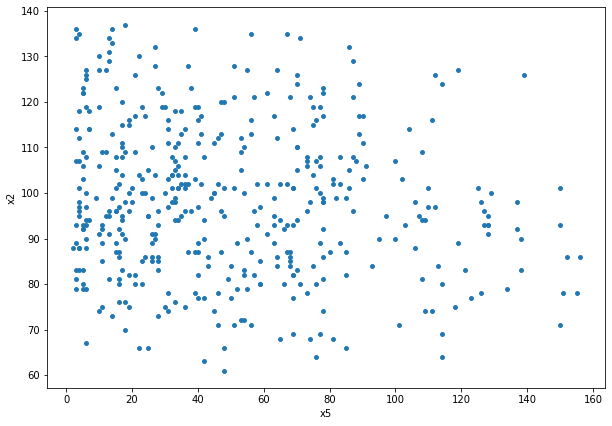

In [20]:
plt.figure(figsize=(10,7))
plt.scatter(data.x5, data.x2, s=15)
plt.xlabel("x5")
plt.ylabel("x2")
plt.show;

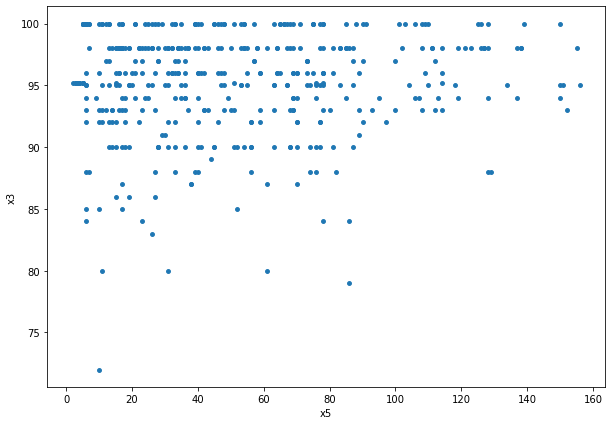

In [21]:
plt.figure(figsize=(10,7))
plt.scatter(data.x5, data.x3, s=15)
plt.xlabel("x5")
plt.ylabel("x3")
plt.show;

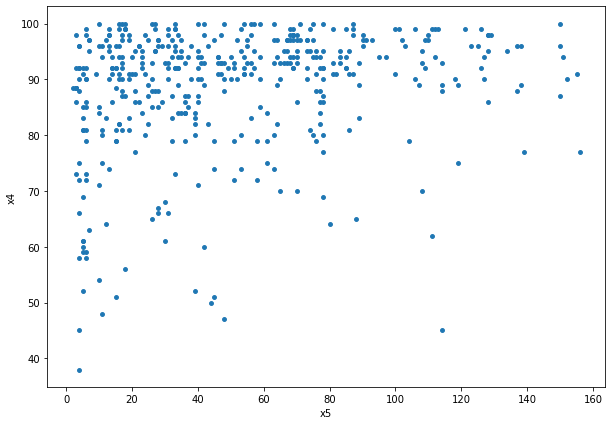

In [22]:
plt.figure(figsize=(10,7))
plt.scatter(data.x5, data.x4, s=15)
plt.xlabel("x5")
plt.ylabel("x4")
plt.show;

### scatterplot  [ x1 vs x2 ]    for all R_enc

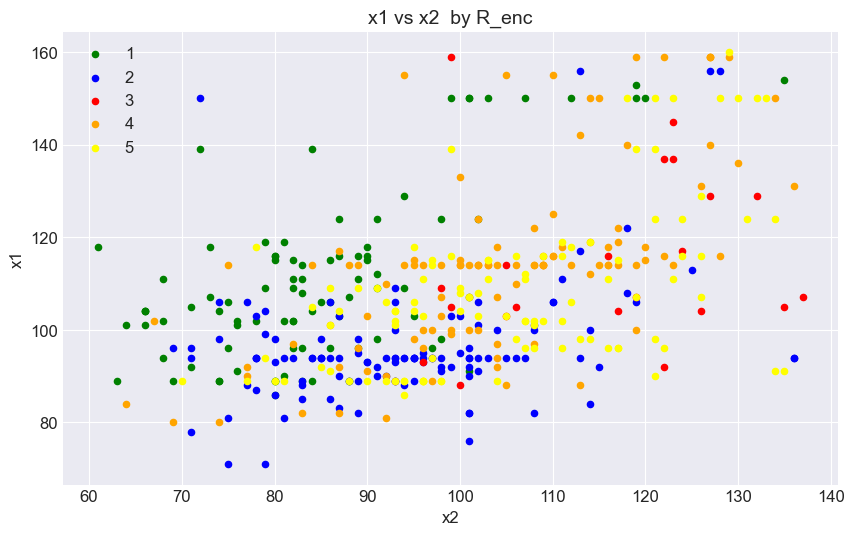

In [23]:
plt.style.use('seaborn-darkgrid')

rr = sorted(data.R_enc.unique())
colors = ['green','blue','red','orange','yellow']
plt.figure(figsize=(10, 6), dpi= 100, facecolor='w', edgecolor='k')

for i, r in enumerate(rr):
    plt.scatter(x='x2', y='x1', data=data.loc[data.R_enc==r], s=20, color=colors[i], label=str(r))

plt.xlabel('x2', fontsize=12)
plt.ylabel('x1', fontsize=12)

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("x1 vs x2  by R_enc", fontsize=14)
plt.legend(fontsize=12)    
plt.show()  

### Function to plot only selected R_enc

In [24]:
def painter(rr:list):
    colors = ['green','blue','red','orange','yellow']
    plt.figure(figsize=(10, 6), dpi= 100, facecolor='w', edgecolor='k')

    for i, r in enumerate(rr):
        plt.scatter(x='x2', y='x1', data=data.loc[data.R_enc==r], s=20, color=colors[i], label=str(r))

    plt.xlabel('x2', fontsize=12)
    plt.ylabel('x1', fontsize=12)

    plt.xticks(fontsize=12); plt.yticks(fontsize=12)
    plt.title("x1 vs x2  by R_enc", fontsize=14)
    plt.legend(fontsize=12)    
    plt.show()  

### Lets make scatterplot  [ x1 vs x2 ]    for R_enc = 1,3,5

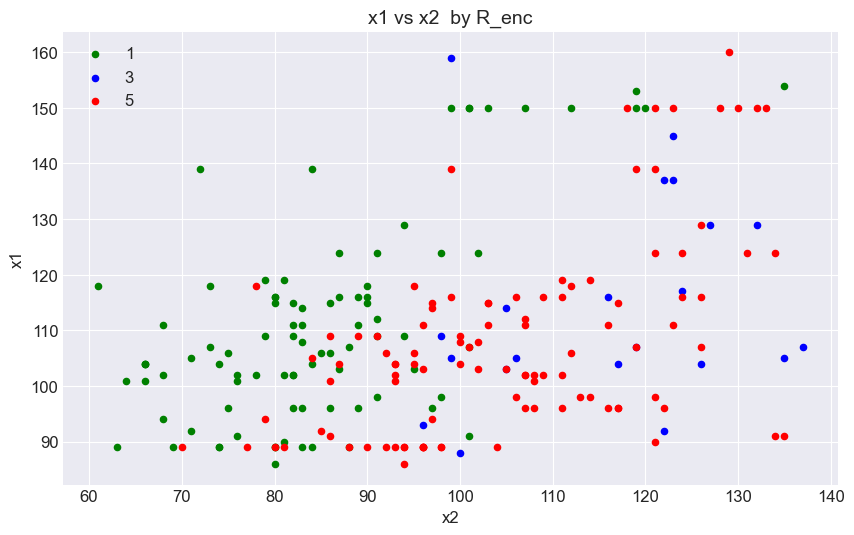

In [25]:
rr = [1, 3, 5]   #  chose here!   rr = [1, 2, 3, 4, 5] 
painter(rr)

###### Average results for R_enc

In [26]:
df = data.groupby('R_enc')['x1', 'x2', 'x3', 'x4', 'x5'].mean()

<ipython-input-26-6ed1e0212b37>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = data.groupby('R_enc')['x1', 'x2', 'x3', 'x4', 'x5'].mean()


In [27]:
df

,x1,x2,x3,x4,x5
R_enc,,,,,
1,110.886364,85.000000,95.817073,91.550168,44.045455
2,96.350427,94.273504,96.365061,88.737130,54.051282
3,114.523810,115.761905,92.247154,88.809524,35.095238
4,114.009174,104.000000,95.970284,87.453346,51.587156
5,107.951923,105.375000,93.089728,86.190668,51.317308


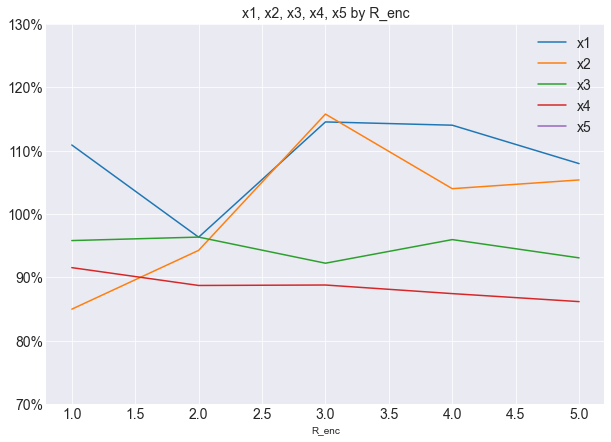

In [28]:
ax = df.plot(ylim=(70,130), figsize=(10,7))
plt.title("x1, x2, x3, x4, x5 by R_enc", fontsize=14)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.legend(fontsize=14) 
ax.yaxis.set_major_formatter(mtick.PercentFormatter());

###### insight of the plot:  
    For most R_enc: range between x1 and x2 is small (about 5%)
    But for R_enc=1:  x1 = 111%, x2 = 85% => range=26%  which lets us make conclusions